<a href="https://colab.research.google.com/github/AlexeyTri/MLScratch/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Discriminant Analisys

Goal - feature reduction. The goal is to project a dataset onto a lower-dimensional space with good class-sepaparability

Eigenvector, Eigenvalues - the eigenvectors point in the direction of the maximum varience, and the corresponding eigenvalues indicates the importance of its corresponding eigen vector

PCA - unsupervised learning, because we don't have y
PLA - supervised learning, we have y -> find parameters axis for maximise separation between classes

Approach:

1. within-class scatter matrix

$S_w = \sum_c S_c$

$S_c=\sum_{i\in c}(x_i - \bar x_c)(x_i - \bar x_c)^T$

2. betweet class scatter matrix

$S_B = \sum_c n_c \cdot(\bar x_c - \bar x)(\bar x_c - \bar x)^T$

3. calculate eigenvectors and eigenvalues covmatrix for $S_w^{-1}S_B$

4. sort the eigenvectors according to their eigenvalues in decreasing order

5. choose first k eigenvectors and that will be the new k dimenstions

6. transform the ordinal, n dimansional data points into k dimensions (=Projections with dot product)




In [1]:
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))

        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4 x n_c) * (n_c x 4) = 4 x 4
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot((mean_diff).T)
        
        A = np.linalg.inv(SW).dot(SB)
        self.eigenvalues, self.eigenvectors = np.linalg.eig(A)
        self.eigenvectors = self.eigenvectors.T
        idx = np.argsort(abs(self.eigenvalues))[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[idx]

        self.linear_discriminants = self.eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [12]:
data = datasets.load_iris()
X = data.data
y = data.target

In [13]:
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

In [14]:
X.shape, X_projected.shape

((150, 4), (150, 2))

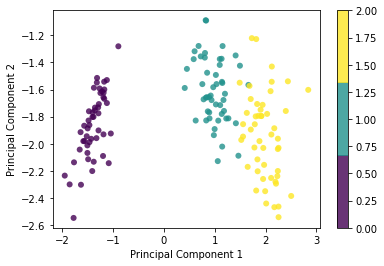

In [15]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()